In [1]:
import pickle as pkl
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import copulagp.bvcopula as bvcopula
from copulagp.vine import CVine

i=1
with open(f'/home/nina/CopulaGP/trained_models/ST260_Day1_Dataset_trained.pkl',"rb") as f:
    trained = pkl.load(f)

device = 'cuda:1'

# Figure 5G

In [6]:
# calculate H(y,v|x)

N_points = 200
inputs = torch.linspace(0,1,N_points,device=device).float()

Hs = []

for reps in tqdm(range(10)):
    %time vine = CVine.marginalize(trained['models'],inputs)
    sem_tol = 0.1
    %time H20 = vine.entropy(sem_tol=sem_tol,mc_size=2000,v=True).cpu().numpy()

    Hs.append([H20])

CPU times: user 16.9 s, sys: 57.6 ms, total: 16.9 s
Wall time: 32.9 s
tensor(1.9041, device='cuda:0')
tensor(1.3409, device='cuda:0')
tensor(1.0916, device='cuda:0')
CPU times: user 3min 31s, sys: 94.7 ms, total: 3min 31s
Wall time: 6min 7s
CPU times: user 16.5 s, sys: 49.2 ms, total: 16.6 s
Wall time: 32.4 s
tensor(1.9058, device='cuda:0')
tensor(1.3282, device='cuda:0')
tensor(1.0880, device='cuda:0')
CPU times: user 3min 25s, sys: 186 ms, total: 3min 25s
Wall time: 5min 9s
CPU times: user 15.9 s, sys: 87.5 ms, total: 16 s
Wall time: 26 s
tensor(1.8541, device='cuda:0')
tensor(1.3255, device='cuda:0')
tensor(1.0909, device='cuda:0')
CPU times: user 3min 22s, sys: 321 ms, total: 3min 22s
Wall time: 3min 47s
CPU times: user 16.1 s, sys: 46.3 ms, total: 16.1 s
Wall time: 29.3 s
tensor(1.8914, device='cuda:0')
tensor(1.3308, device='cuda:0')
tensor(1.0818, device='cuda:0')
CPU times: user 3min 24s, sys: 126 ms, total: 3min 25s
Wall time: 4min 32s
CPU times: user 16.5 s, sys: 54.6 ms, tot

In [ ]:
for h in Hs:
    plt.plot(h[0])

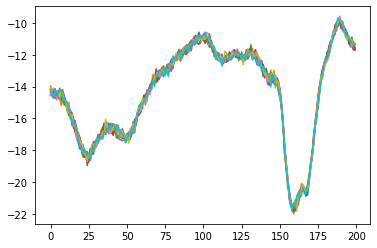

In [11]:
for h in Hs:
    plt.plot(h[0])

In [7]:
with open(f"/home/nina/CopulaGP/plos_fig5_data/HYgX_109V_all.pkl","wb") as f:
    pkl.dump([20,inputs.cpu().numpy(),Hs],f)

# Figure 5H

In [3]:
Ns = [108,100,90,80,70,60,50,40,30,20,10,9,8,7,6,5,4,3,2]

In [ ]:
# calculate I(u^x,x)
MIs = []

assert len(trained['models'][0])==108

sem_tol = 0.1

reshuffle = np.arange(len(trained['X']))
np.random.shuffle(reshuffle)
inputs = torch.tensor(trained['X'][reshuffle[:500]],device=device).float()

for i in Ns:
    layers = [trained['models'][j][:i-j] for j in range(min(i-1,20))]
    %time vine = CVine.marginalize(layers,inputs)
    %time MI = vine.inputMI(sem_tol=sem_tol, s_mc_size=50, r_mc_size=20, sR_mc_size=1000, v=True)

    MIs.append([i,MI])
    
with open("../../plos_fig5_data/MI_CopulaGP_integrated.pkl","wb") as f:
    pkl.dump([Ns,MIs],f)

CPU times: user 18.1 s, sys: 205 ms, total: 18.3 s
Wall time: 32.3 s
Start calculating p(r) 0
Finished in 2 steps
16.2,13.8,2.45,                        5.33,4.14
Start calculating p(r) 1
Finished in 2 steps
16.4,14.1,2.34,                        3.63,2.92
Start calculating p(r) 2
Finished in 4 steps
16.3,14.0,2.34,                        2.96,2.39
Start calculating p(r) 3
Finished in 3 steps
16.1,13.8,2.32,                        2.52,2.04
Start calculating p(r) 4
Finished in 4 steps
15.9,13.6,2.31,                        2.24,1.81
Start calculating p(r) 5
Finished in 4 steps
15.6,13.3,2.29,                        2.03,1.64
Start calculating p(r) 6
Finished in 2 steps
15.6,13.3,2.25,                        1.84,1.51
Start calculating p(r) 7
Finished in 3 steps
15.5,13.3,2.22,                        1.69,1.4
Start calculating p(r) 8
Finished in 5 steps
15.5,13.3,2.22,                        1.59,1.32
Start calculating p(r) 9
Finished in 4 steps
15.5,13.3,2.22,                        1.

Start calculating p(r) 17
Finished in 3 steps
14.1,12.3,1.85,                        1.04,0.889
Start calculating p(r) 18
Finished in 3 steps
14.1,12.3,1.86,                        1.01,0.865
Start calculating p(r) 19
Finished in 2 steps
14.1,12.3,1.86,                        0.988,0.843
CPU times: user 6min 26s, sys: 1.06 s, total: 6min 27s
Wall time: 8min 49s
CPU times: user 10.6 s, sys: 71.8 ms, total: 10.6 s
Wall time: 23.8 s
Start calculating p(r) 0
Finished in 2 steps
13.8,12.1,1.69,                        4.33,3.79
Start calculating p(r) 1
Finished in 3 steps
13.7,12.1,1.67,                        3.08,2.68
Start calculating p(r) 2
Finished in 3 steps
13.7,11.9,1.78,                        2.63,2.2
Start calculating p(r) 3
Finished in 3 steps
13.7,11.9,1.76,                        2.24,1.89
Start calculating p(r) 4
Finished in 2 steps
13.6,11.8,1.76,                        1.99,1.69
Start calculating p(r) 5
Finished in 2 steps
13.6,11.9,1.73,                        1.78,1.54
Sta

CPU times: user 1.88 s, sys: 3.94 ms, total: 1.89 s
Wall time: 2.69 s
Start calculating p(r) 0
Finished in 2 steps
7.4,6.85,0.549,                        2.52,2.45
Start calculating p(r) 1
Finished in 2 steps
7.11,6.55,0.565,                        1.75,1.69
Start calculating p(r) 2
Finished in 1 steps
7.29,6.73,0.567,                        1.48,1.43
Start calculating p(r) 3
Finished in 1 steps
7.28,6.71,0.567,                        1.27,1.22
Start calculating p(r) 4
Finished in 2 steps
7.24,6.67,0.57,                        1.12,1.09
Start calculating p(r) 5
Finished in 1 steps
7.29,6.72,0.568,                        1.04,0.996
Start calculating p(r) 6
Finished in 2 steps
7.3,6.73,0.572,                        0.964,0.924
CPU times: user 13.6 s, sys: 54.1 ms, total: 13.6 s
Wall time: 26 s
CPU times: user 478 ms, sys: 3.64 ms, total: 481 ms
Wall time: 1.47 s
Start calculating p(r) 0
Finished in 1 steps
4.83,4.5,0.335,                        1.67,1.64
Start calculating p(r) 1
Finished

In [4]:
with open(f'/home/nina/CopulaGP/trained_models/ST260_Day1_DatasetS_trained.pkl',"rb") as f:
    trainedS = pkl.load(f)

MIs_est = []
    
sem_tol = 0.1

reshuffle = np.arange(len(trained['X']))
np.random.shuffle(reshuffle)
inputs = torch.tensor(trained['X'][reshuffle[:500]],device=device).float()
    
    
for i in Ns:
    layers = [trained['models'][j][:i-j] for j in range(min(i-1,20))]
    %time vine = CVine.marginalize(layers,inputs)
    %time H = vine.entropy(sem_tol=sem_tol,mc_size=1000,v=True).cpu().numpy()
    
    layers = [trainedS['models'][j][:i-j] for j in range(min(i-1,20))]
    %time vineS = CVine.marginalize(layers,inputs)
    %time HS = vineS.entropy(sem_tol=sem_tol,mc_size=1000,v=True).cpu().numpy()
    
    print(np.mean(HS-H))

    MIs_est.append([i,np.mean(HS)-np.mean(H)])
    
with open("../../plos_fig5_data/MI_CopulaGP_estimated.pkl","wb") as f:
    pkl.dump([Ns,MIs_est],f)

CPU times: user 18.7 s, sys: 146 ms, total: 18.9 s
Wall time: 36.8 s
tensor(2.7494, device='cuda:0')
tensor(1.9299, device='cuda:0')
tensor(1.5388, device='cuda:0')
tensor(1.3495, device='cuda:0')
tensor(1.1951, device='cuda:0')
tensor(1.1033, device='cuda:0')
tensor(1.0155, device='cuda:0')
CPU times: user 7min 34s, sys: 819 ms, total: 7min 35s
Wall time: 12min 24s
CPU times: user 17.6 s, sys: 55.8 ms, total: 17.7 s
Wall time: 36.5 s
tensor(1.8558, device='cuda:0')
tensor(1.2995, device='cuda:0')
tensor(1.0488, device='cuda:0')
CPU times: user 3min 38s, sys: 209 ms, total: 3min 39s
Wall time: 4min 31s
3.0540063
CPU times: user 15.6 s, sys: 54.2 ms, total: 15.7 s
Wall time: 30.8 s
tensor(2.7730, device='cuda:0')
tensor(1.9270, device='cuda:0')
tensor(1.5489, device='cuda:0')
tensor(1.3391, device='cuda:0')
tensor(1.2012, device='cuda:0')
tensor(1.0934, device='cuda:0')
tensor(1.0095, device='cuda:0')
CPU times: user 7min 16s, sys: 614 ms, total: 7min 17s
Wall time: 11min 46s
CPU times:

In [8]:
from copulagp.MI import BI_KSG

MI_KSG = []
for i in tqdm.tqdm(Ns):
    mi, _ = BI_KSG(trained['X'].reshape(-1,1),trained['Y'][:,:i])
    MI_KSG.append(mi)
    print(mi)
with open("../../plos_fig5_data/MI_KSG.pkl","wb") as f:
    pkl.dump([Ns,MI_KSG],f)

-0.06099654895066115
-0.03986131268375232
-0.02927459997843107
-0.02200298898868935
-0.01611234885982857
0.01112668345155461
0.028912592706137132
0.05754269508284846
0.08710677208899811
0.08894959467831991
0.086226130193683
0.09026774374123746
0.07954997377914003
0.10223551203960383
0.10685752234427694
0.09784357758419601
0.10447502863036043
0.1096893255932253
0.1020234450043036



In [7]:
from copulagp.MI import train_MINE

MI_MINE = []
for i in tqdm.tqdm(Ns):
    mi = train_MINE(trained['Y'][:,:i], x = torch.tensor(trained['X'],device=device).float(),H=500,device=device)
    MI_MINE.append(mi)
with open("../../plos_fig5_data/MI_MINE.pkl","wb") as f:
    pkl.dump([Ns,MI_MINE],f)

In [81]:
[mi[1][0] for mi in MIs]

[tensor([2.1705], device='cuda:0'),
 tensor([2.1561], device='cuda:0'),
 tensor([2.0544], device='cuda:0'),
 tensor([1.8603], device='cuda:0'),
 tensor([1.7060], device='cuda:0'),
 tensor([1.4976], device='cuda:0'),
 tensor([1.2845], device='cuda:0'),
 tensor([1.0835], device='cuda:0'),
 tensor([0.8096], device='cuda:0'),
 tensor([0.5723], device='cuda:0'),
 tensor([0.3098], device='cuda:0'),
 tensor([0.2953], device='cuda:0'),
 tensor([0.2519], device='cuda:0'),
 tensor([0.2467], device='cuda:0'),
 tensor([0.1934], device='cuda:0'),
 tensor([0.1674], device='cuda:0'),
 tensor([0.1309], device='cuda:0'),
 tensor([0.0927], device='cuda:0'),
 tensor([0.0527], device='cuda:0')]

In [5]:
MIs_est

[[108, 3.0540056],
 [100, 3.0394669],
 [90, 2.8512068],
 [80, 2.4189453],
 [70, 2.166131],
 [60, 1.9255762],
 [50, 1.5682125],
 [40, 1.3080473],
 [30, 1.0138516],
 [20, 0.707149],
 [10, 0.35998678],
 [9, 0.32897234],
 [8, 0.2877226],
 [7, 0.2179594],
 [6, 0.20754528],
 [5, 0.17183137],
 [4, 0.11944246],
 [3, 0.08672094],
 [2, 0.054860234]]